In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score

## JITGNN openstack all tokens

In [19]:
df = pd.read_csv('../data/test_result_15.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.010518
1,1,0,0.634129
2,2,0,0.022170
3,3,0,0.250673
4,4,0,0.000984
...,...,...,...
1027,1027,0,0.021710
1028,1028,0,0.259689
1029,1029,0,0.750613
1030,1030,0,0.024426


In [20]:
roc_auc_score(df['y_true'], df['y_score'])

0.7474214658691007

In [21]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

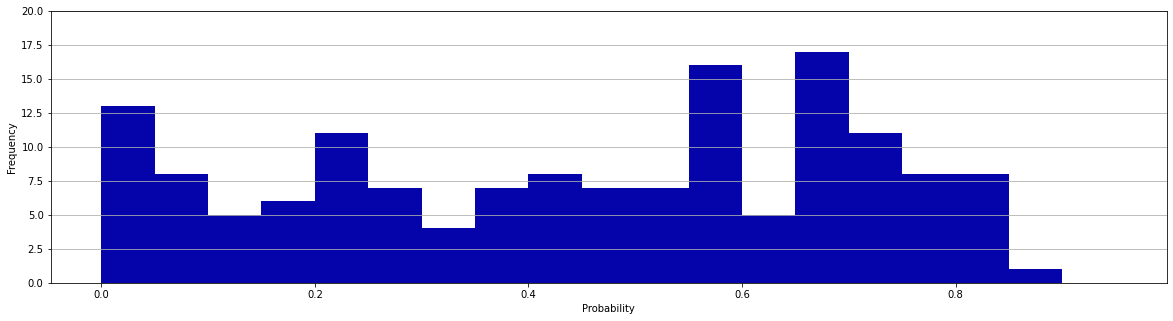

mean=0.45, median=0.50, std=0.26


In [22]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

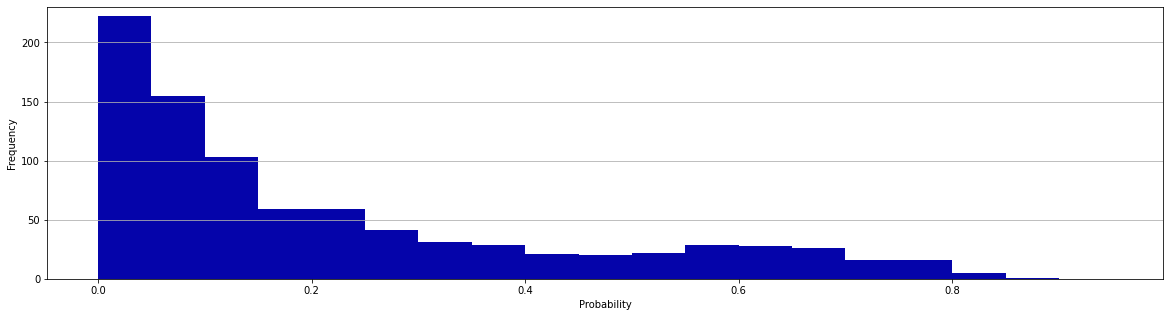

mean=0.22, median=0.13, std=0.22


In [23]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [24]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.25, r=0.79, f1=0.38
at 0.21 threshold, p=0.26, r=0.77, f1=0.39
at 0.22 threshold, p=0.26, r=0.75, f1=0.39
at 0.23 threshold, p=0.27, r=0.74, f1=0.39
at 0.24 threshold, p=0.27, r=0.73, f1=0.39
at 0.25 threshold, p=0.27, r=0.71, f1=0.39
at 0.26 threshold, p=0.28, r=0.71, f1=0.40
at 0.27 threshold, p=0.28, r=0.69, f1=0.40
at 0.28 threshold, p=0.28, r=0.68, f1=0.39
at 0.29 threshold, p=0.29, r=0.68, f1=0.40
at 0.30 threshold, p=0.29, r=0.66, f1=0.40
at 0.31 threshold, p=0.29, r=0.65, f1=0.40
at 0.32 threshold, p=0.30, r=0.65, f1=0.41
at 0.33 threshold, p=0.30, r=0.64, f1=0.41
at 0.34 threshold, p=0.30, r=0.64, f1=0.41
at 0.35 threshold, p=0.31, r=0.64, f1=0.42
at 0.36 threshold, p=0.31, r=0.62, f1=0.41
at 0.37 threshold, p=0.31, r=0.60, f1=0.41
at 0.38 threshold, p=0.31, r=0.59, f1=0.41
at 0.39 threshold, p=0.32, r=0.59, f1=0.41
at 0.40 threshold, p=0.32, r=0.59, f1=0.42
at 0.41 threshold, p=0.33, r=0.59, f1=0.42
at 0.42 threshold, p=0.33, r=0.58, f1=0.42
at 0.43 thr

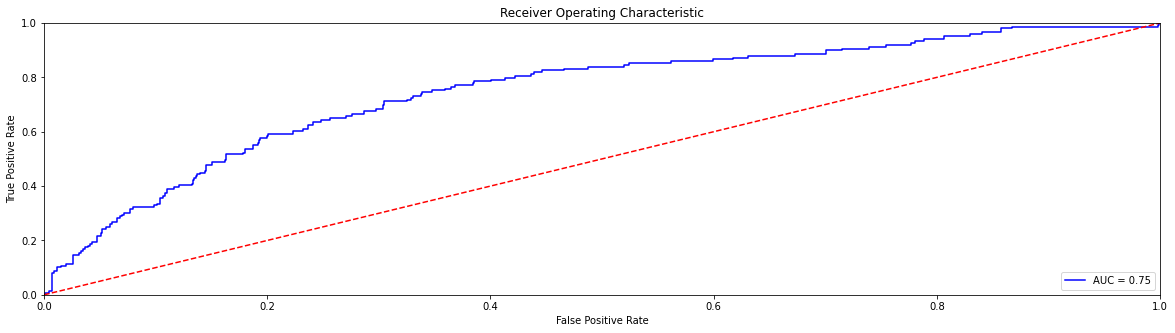

In [25]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

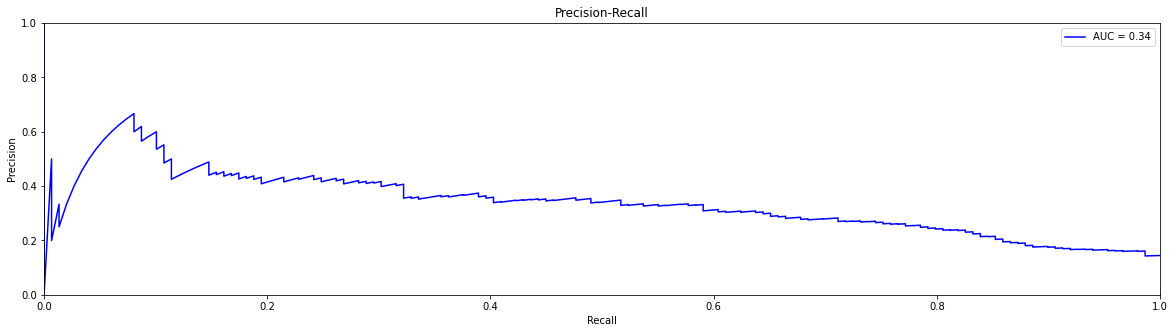

In [26]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## JITLine openstack

In [118]:
df = pd.read_csv('../data/openstack_RF_DE_SMOTE_min_df_3_prediction_result.csv').drop(['pred'], axis=1)
df

,Unnamed: 0,prob,actual,test_commit
0,0,0.230000,0,001f865c3cd5f55ddc52c8b68ef49d6b00fe0395
1,1,0.106667,0,0044a90a7409c5b004cc2d0cc56f6afeaf54ccf9
2,2,0.096667,0,006fea117307460544492a3548203a9ef31f34ba
3,3,0.416667,0,00a162c4d42a0f7813058d2ae5c3208b4f7a3157
4,4,0.003333,0,00a4f63f373af0b87c9c4ba8671720bb8324c80a
...,...,...,...,...
1027,1027,0.290000,0,ff6a3dc031d782d01607e28c8bd3fb5aa396bb16
1028,1028,0.346667,1,ff6e64992bf40fd2ac6618cbe50b8844e35b6538
1029,1029,0.330000,0,ff753cd608973f5d72a80aef0f9fb8a646fccc3f
1030,1030,0.723333,0,ff7623f3c9e34a30ebff213fe19c775b1848eb2a


In [119]:
roc_auc_score(df['actual'], df['prob'])

0.7940707016197072

In [120]:
buggy_df = df[df['actual'] == 1]
clean_df = df[df['actual'] == 0]

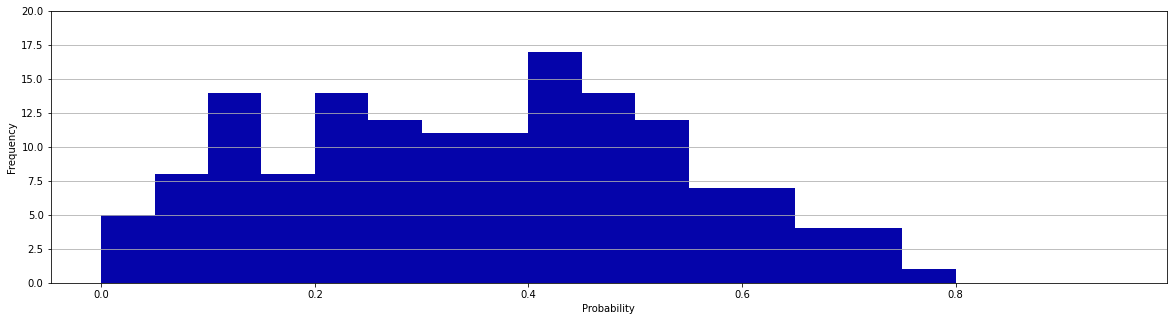

mean=0.35, median=0.36, std=0.19


In [123]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

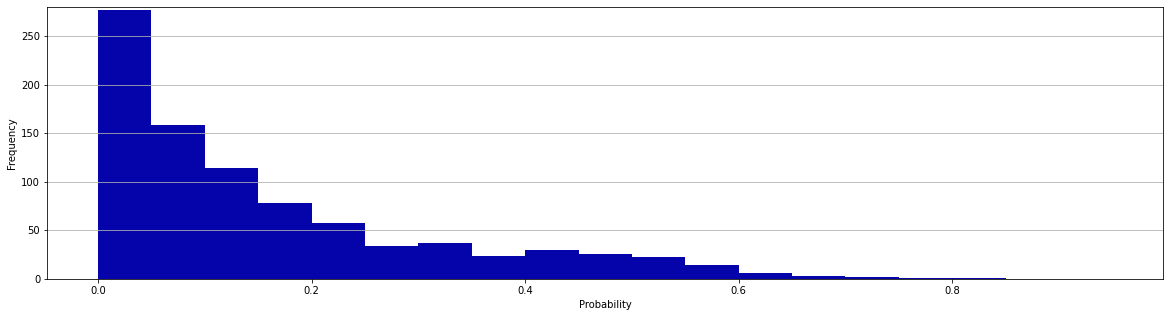

mean=0.16, median=0.10, std=0.16


In [124]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['prob'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['prob'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [74]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['prob']]
    p, r, f1, _ = precision_recall_fscore_support(df['actual'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.31, r=0.77, f1=0.44
at 0.21 threshold, p=0.32, r=0.75, f1=0.45
at 0.22 threshold, p=0.32, r=0.71, f1=0.44
at 0.23 threshold, p=0.32, r=0.70, f1=0.44
at 0.24 threshold, p=0.33, r=0.68, f1=0.45
at 0.25 threshold, p=0.33, r=0.66, f1=0.44
at 0.26 threshold, p=0.33, r=0.65, f1=0.44
at 0.27 threshold, p=0.33, r=0.63, f1=0.43
at 0.28 threshold, p=0.34, r=0.63, f1=0.44
at 0.29 threshold, p=0.34, r=0.60, f1=0.43
at 0.30 threshold, p=0.35, r=0.59, f1=0.44
at 0.31 threshold, p=0.36, r=0.58, f1=0.44
at 0.32 threshold, p=0.36, r=0.56, f1=0.44
at 0.33 threshold, p=0.38, r=0.56, f1=0.45
at 0.34 threshold, p=0.38, r=0.54, f1=0.44
at 0.35 threshold, p=0.38, r=0.52, f1=0.44
at 0.36 threshold, p=0.37, r=0.50, f1=0.43
at 0.37 threshold, p=0.38, r=0.48, f1=0.42
at 0.38 threshold, p=0.38, r=0.46, f1=0.42
at 0.39 threshold, p=0.38, r=0.45, f1=0.41
at 0.40 threshold, p=0.38, r=0.42, f1=0.40
at 0.41 threshold, p=0.39, r=0.41, f1=0.40
at 0.42 threshold, p=0.39, r=0.38, f1=0.38
at 0.43 thr

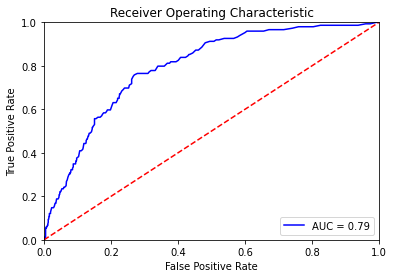

In [77]:
fpr, tpr, _ = roc_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

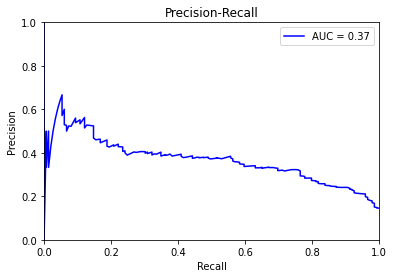

In [78]:
p, r, _ = precision_recall_curve(df['actual'], df['prob'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## apache balance spacial tokens

In [3]:
df = pd.read_csv('../data/test_result_18.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.422226
1,1,0,0.798243
2,2,0,0.273409
3,3,0,0.574566
4,4,0,0.294470
...,...,...,...
6456,6456,0,0.272401
6457,6457,0,0.335241
6458,6458,0,0.074335
6459,6459,0,0.161513


In [4]:
roc_auc_score(df['y_true'], df['y_score'])

0.7903112990671977

In [5]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

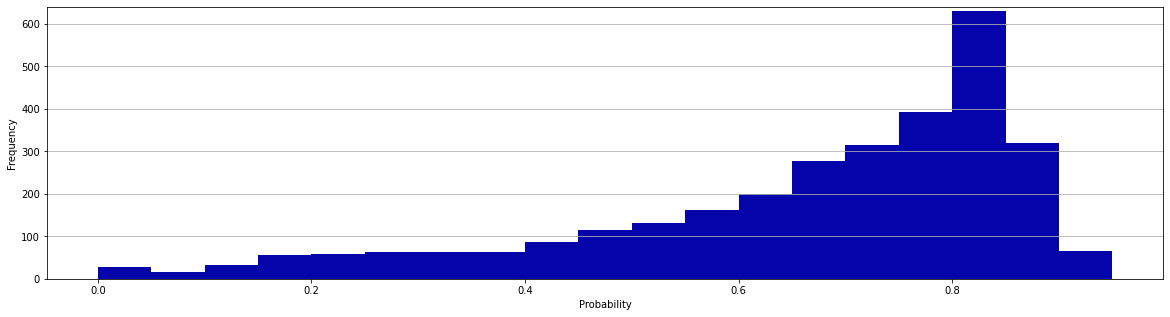

mean=0.67, median=0.73, std=0.20


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

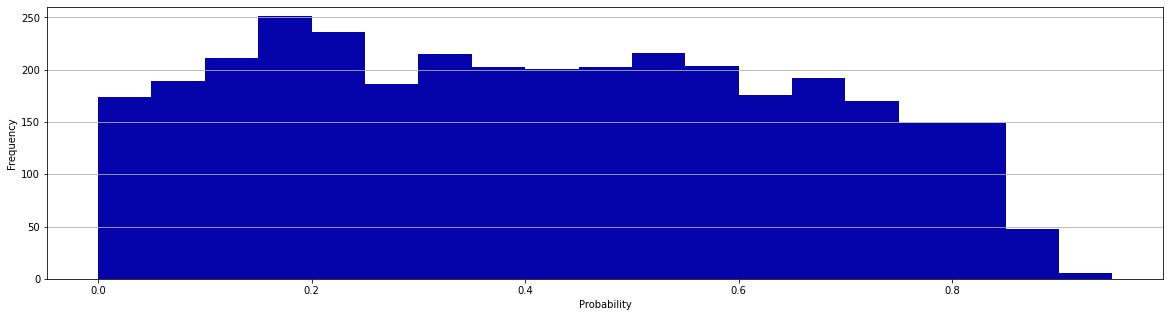

mean=0.41, median=0.41, std=0.24


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [9]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.54, r=0.96, f1=0.69
at 0.21 threshold, p=0.54, r=0.95, f1=0.69
at 0.22 threshold, p=0.54, r=0.95, f1=0.69
at 0.23 threshold, p=0.55, r=0.95, f1=0.69
at 0.24 threshold, p=0.55, r=0.94, f1=0.69
at 0.25 threshold, p=0.56, r=0.94, f1=0.70
at 0.26 threshold, p=0.56, r=0.94, f1=0.70
at 0.27 threshold, p=0.56, r=0.93, f1=0.70
at 0.28 threshold, p=0.57, r=0.93, f1=0.70
at 0.29 threshold, p=0.57, r=0.93, f1=0.70
at 0.30 threshold, p=0.57, r=0.92, f1=0.70
at 0.31 threshold, p=0.57, r=0.91, f1=0.71
at 0.32 threshold, p=0.58, r=0.91, f1=0.71
at 0.33 threshold, p=0.58, r=0.91, f1=0.71
at 0.34 threshold, p=0.59, r=0.90, f1=0.71
at 0.35 threshold, p=0.59, r=0.90, f1=0.71
at 0.36 threshold, p=0.59, r=0.89, f1=0.71
at 0.37 threshold, p=0.60, r=0.89, f1=0.72
at 0.38 threshold, p=0.60, r=0.89, f1=0.72
at 0.39 threshold, p=0.61, r=0.88, f1=0.72
at 0.40 threshold, p=0.61, r=0.88, f1=0.72
at 0.41 threshold, p=0.62, r=0.87, f1=0.72
at 0.42 threshold, p=0.62, r=0.87, f1=0.72
at 0.43 thr

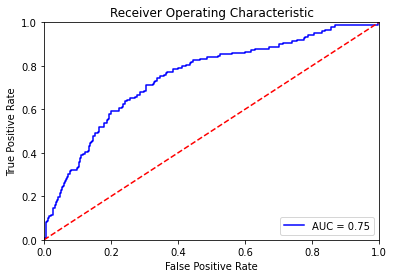

In [66]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

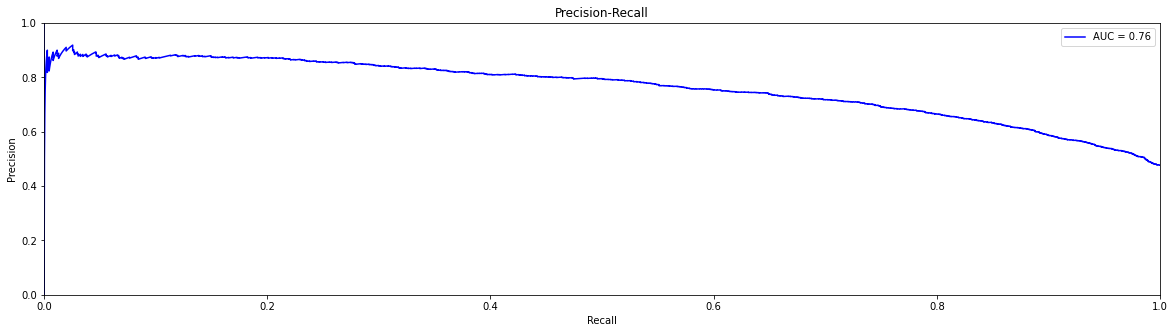

In [10]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## apache unbalance spacial tokens

In [3]:
df = pd.read_csv('../data/test_result_20.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,7.236878e-13
1,1,0,4.031732e-10
2,2,0,5.352125e-12
3,3,0,4.818599e-11
4,4,0,1.383762e-15
...,...,...,...
6456,6456,0,7.015243e-16
6457,6457,0,5.209852e-10
6458,6458,0,3.894311e-10
6459,6459,0,1.521096e-09


In [4]:
roc_auc_score(df['y_true'], df['y_score'])

0.6546353965610949

In [5]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

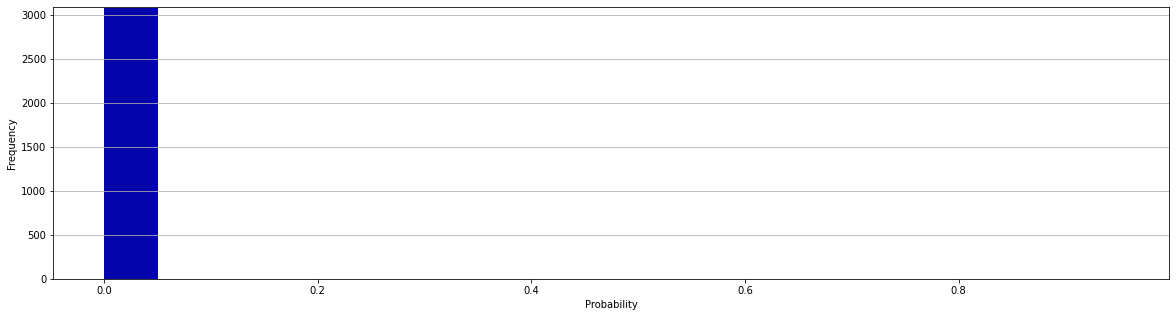

mean=0.00, median=0.00, std=0.00


In [6]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

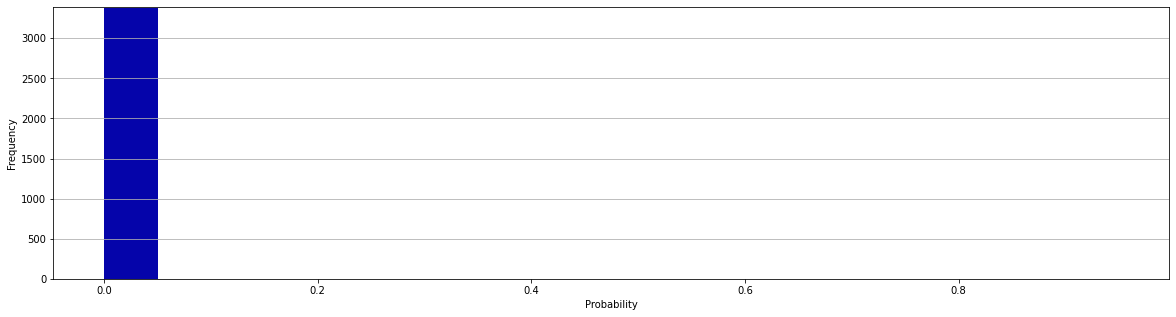

mean=0.00, median=0.00, std=0.00


In [7]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [8]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/h3keshav/anacond

at 0.20 threshold, p=0.00, r=0.00, f1=0.00
at 0.21 threshold, p=0.00, r=0.00, f1=0.00
at 0.22 threshold, p=0.00, r=0.00, f1=0.00
at 0.23 threshold, p=0.00, r=0.00, f1=0.00
at 0.24 threshold, p=0.00, r=0.00, f1=0.00
at 0.25 threshold, p=0.00, r=0.00, f1=0.00
at 0.26 threshold, p=0.00, r=0.00, f1=0.00
at 0.27 threshold, p=0.00, r=0.00, f1=0.00
at 0.28 threshold, p=0.00, r=0.00, f1=0.00
at 0.29 threshold, p=0.00, r=0.00, f1=0.00
at 0.30 threshold, p=0.00, r=0.00, f1=0.00
at 0.31 threshold, p=0.00, r=0.00, f1=0.00
at 0.32 threshold, p=0.00, r=0.00, f1=0.00
at 0.33 threshold, p=0.00, r=0.00, f1=0.00
at 0.34 threshold, p=0.00, r=0.00, f1=0.00
at 0.35 threshold, p=0.00, r=0.00, f1=0.00
at 0.36 threshold, p=0.00, r=0.00, f1=0.00
at 0.37 threshold, p=0.00, r=0.00, f1=0.00
at 0.38 threshold, p=0.00, r=0.00, f1=0.00
at 0.39 threshold, p=0.00, r=0.00, f1=0.00
at 0.40 threshold, p=0.00, r=0.00, f1=0.00
at 0.41 threshold, p=0.00, r=0.00, f1=0.00
at 0.42 threshold, p=0.00, r=0.00, f1=0.00
at 0.43 thr

/home/h3keshav/anaconda3/envs/jit/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


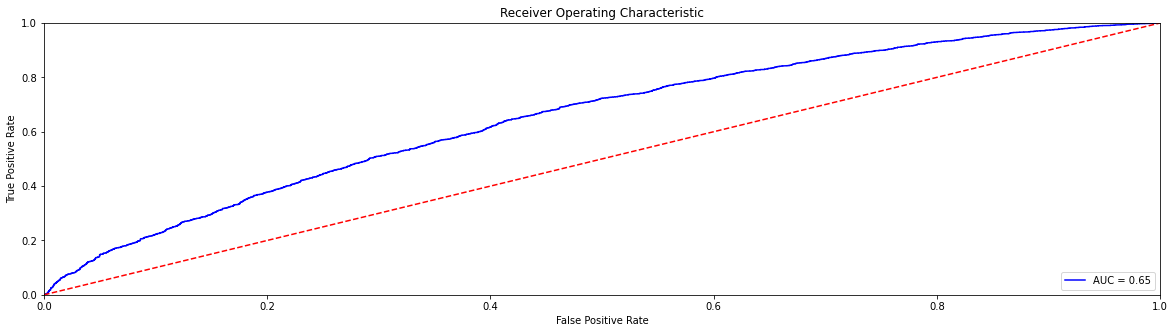

In [9]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

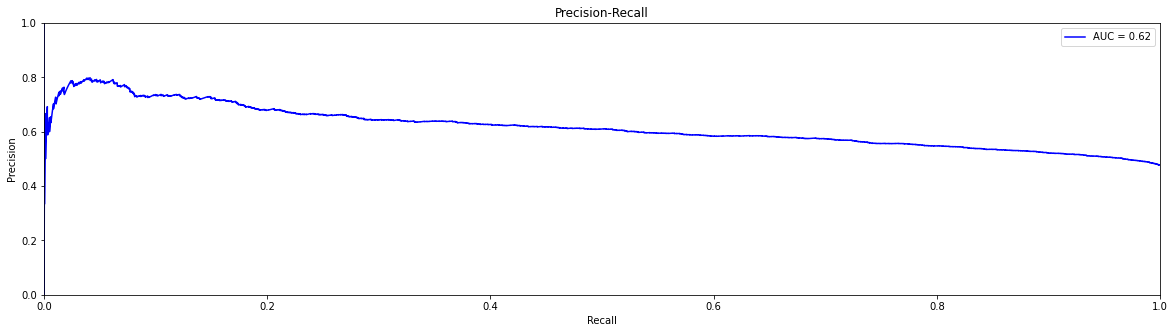

In [10]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

## cross-lingual spacial tokens

In [11]:
df = pd.read_csv('../data/test_result_21.csv')
df

,Unnamed: 0,y_true,y_score
0,0,0,0.373526
1,1,0,0.313082
2,2,0,0.236330
3,3,0,0.163923
4,4,0,0.124792
...,...,...,...
1027,1027,0,0.399147
1028,1028,0,0.377693
1029,1029,0,0.417976
1030,1030,0,0.314656


In [12]:
roc_auc_score(df['y_true'], df['y_score'])

0.6437100488724377

In [13]:
buggy_df = df[df['y_true'] == 1]
clean_df = df[df['y_true'] == 0]

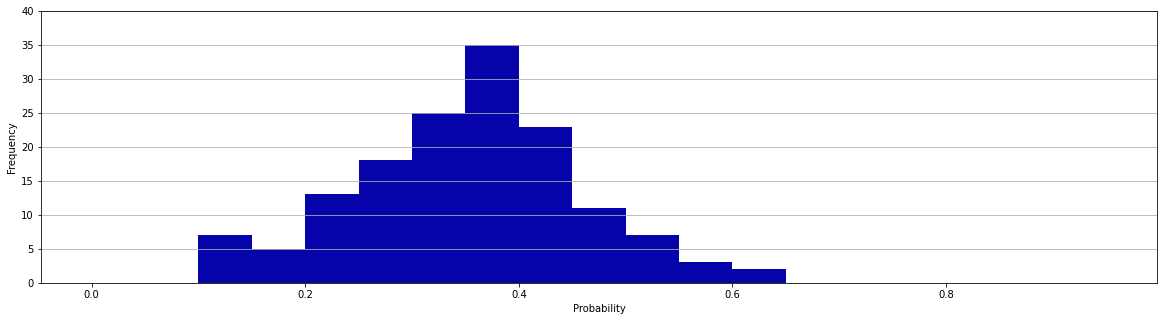

mean=0.35, median=0.36, std=0.11


In [14]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=buggy_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = buggy_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

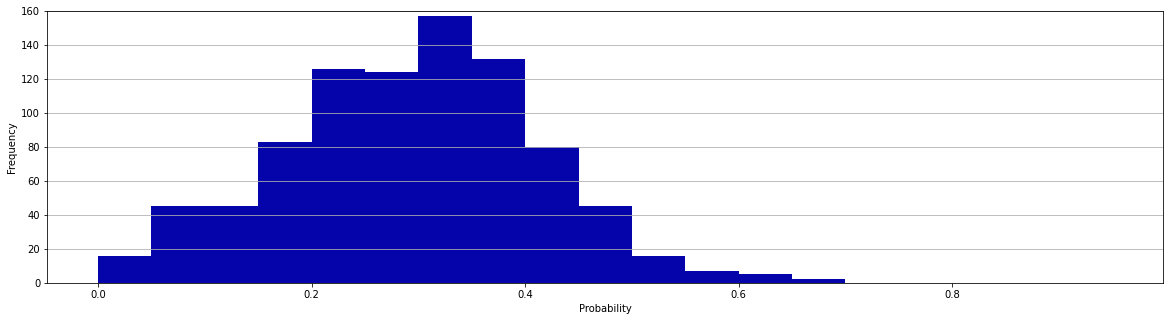

mean=0.29, median=0.30, std=0.12


In [15]:
plt.rcParams['figure.figsize'] = [20, 5]
n, bins, patches = plt.hist(x=clean_df['y_score'], bins=np.arange(0.0, 1.0, 0.05), color='#0504aa')
plt.grid(axis='y')
plt.xlabel('Probability')
plt.ylabel('Frequency')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

agg = clean_df['y_score'].agg(['mean', 'median', 'std'])
print('mean={:.2f}, median={:.2f}, std={:.2f}'.format(agg['mean'], agg['median'], agg['std']))

In [16]:
bound = np.arange(0.20, 0.60, 0.01)

for b in bound:
    pred = [1 if prob >= b else 0 for prob in df['y_score']]
    p, r, f1, _ = precision_recall_fscore_support(df['y_true'], pred, average='binary')
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.16, r=0.92, f1=0.28
at 0.21 threshold, p=0.17, r=0.90, f1=0.28
at 0.22 threshold, p=0.17, r=0.88, f1=0.29
at 0.23 threshold, p=0.17, r=0.87, f1=0.29
at 0.24 threshold, p=0.18, r=0.85, f1=0.29
at 0.25 threshold, p=0.18, r=0.83, f1=0.29
at 0.26 threshold, p=0.18, r=0.81, f1=0.30
at 0.27 threshold, p=0.19, r=0.80, f1=0.31
at 0.28 threshold, p=0.19, r=0.77, f1=0.30
at 0.29 threshold, p=0.19, r=0.73, f1=0.30
at 0.30 threshold, p=0.19, r=0.71, f1=0.30
at 0.31 threshold, p=0.20, r=0.68, f1=0.30
at 0.32 threshold, p=0.20, r=0.64, f1=0.30
at 0.33 threshold, p=0.21, r=0.61, f1=0.31
at 0.34 threshold, p=0.21, r=0.56, f1=0.30
at 0.35 threshold, p=0.22, r=0.54, f1=0.31
at 0.36 threshold, p=0.23, r=0.52, f1=0.32
at 0.37 threshold, p=0.23, r=0.48, f1=0.31
at 0.38 threshold, p=0.22, r=0.40, f1=0.28
at 0.39 threshold, p=0.22, r=0.36, f1=0.27
at 0.40 threshold, p=0.23, r=0.31, f1=0.26
at 0.41 threshold, p=0.23, r=0.28, f1=0.25
at 0.42 threshold, p=0.24, r=0.25, f1=0.24
at 0.43 thr

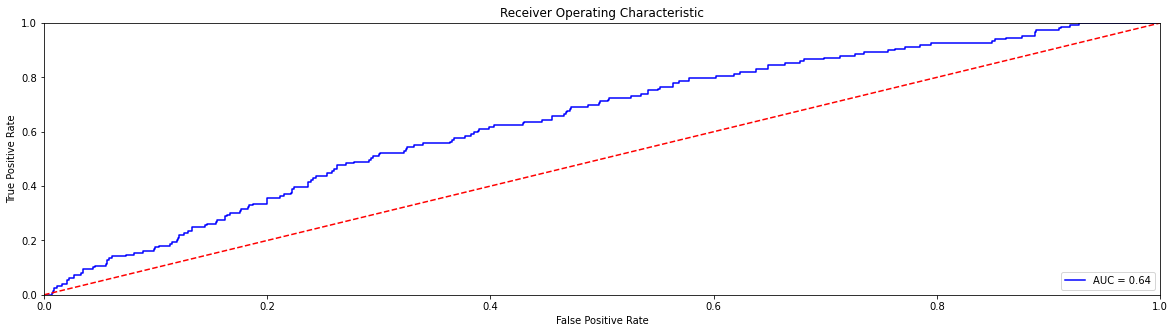

In [17]:
fpr, tpr, _ = roc_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

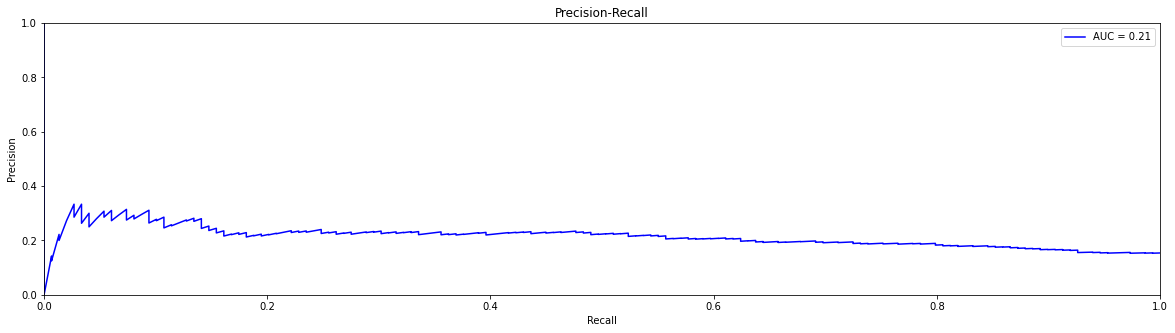

In [18]:
p, r, _ = precision_recall_curve(df['y_true'], df['y_score'])

plt.clf()
plt.title('Precision-Recall')
plt.plot(r, p, 'b', label='AUC = %0.2f' % metrics.auc(r, p))
plt.legend(loc='upper right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()